In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
from pymatch.Matcher import Matcher

In [3]:
df = pd.read_csv('propensity_dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965984 entries, 0 to 2965983
Data columns (total 9 columns):
Hashed_ID              object
Tenure                 float64
Average_Turnover       float64
Average_Trans_Count    float64
Times_Marketed_To      int64
Message                object
Xer                    float64
mcc_rating             int64
responded              int64
dtypes: float64(4), int64(3), object(2)
memory usage: 203.7+ MB


In [5]:
test = df[df['responded'] == 1]
control = df[df['responded'] == 0]

In [6]:
m = Matcher(test, control, yvar ='responded', exclude = ['Hashed_ID'])

Formula:
responded ~ Tenure+Average_Turnover+Average_Trans_Count+Times_Marketed_To+Message+Xer+mcc_rating
n majority: 2001897
n minority: 8460


In [7]:
m.fit_scores(balance = True, nmodels = 100)

Fitting Models on Balanced Samples: 22\100

c:\users\ryan.skeels\appdata\local\continuum\anaconda2\envs\py36_pam\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)


Fitting Models on Balanced Samples: 100\100
Average Accuracy: 63.52%


In [8]:
m.predict_scores()

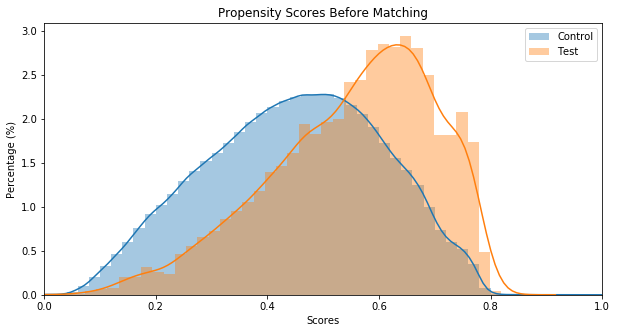

In [10]:
m.plot_scores()

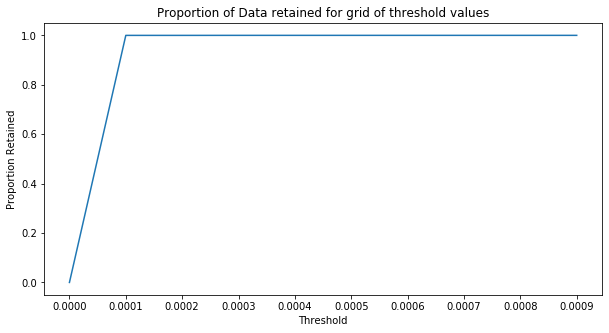

In [11]:
m.tune_threshold(method = 'random')

In [12]:
m.match(method="min", nmatches=1, threshold=0.0001)

In [13]:
m.record_frequency()

,freq,n_records
0,1,16814
1,2,53


In [14]:
m.assign_weight_vector()

In [15]:
m.matched_data.sort_values("match_id").head(6)

,record_id,weight,Hashed_ID,Tenure,Average_Turnover,Average_Trans_Count,Times_Marketed_To,Message,Xer,mcc_rating,responded,scores,match_id
0,0,1.0,1DA110EE76F08B3B32B64A269D0CF7D39B50A19B000000...,45.0,1472.00,125.00,6,Pre-Approved,0.931312,1,1,0.695573,0
9960,492320,1.0,870C8091AB520C523DF40301E682E03731EE069A000000...,27.0,4921.00,494.00,8,Pre-Approved,1.137596,1,0,0.695573,0
1,2,1.0,2A7EF3C5A1111B9B3F517F1C0B92406097A83F75000000...,52.0,1406.03,164.83,11,Eligible,1.454373,1,1,0.627559,1
11722,1280148,1.0,DF6F596F288E0C66E9EEE957E3E600625B5160B9000000...,73.0,4776.00,318.00,1,Elg-PA,1.310044,1,0,0.627559,1
2,5,1.0,CDBF8A2FFCCA1876179AB7F1D4FBB470FBAE2E18000000...,48.0,4926.87,403.00,24,Eligible,1.166961,1,1,0.548933,2
12344,1513620,1.0,60C8356F979108F601FB5929EC5887E54D0F7027000000...,10.0,11439.00,16.00,7,Eligible,0.656158,-1,0,0.548933,2


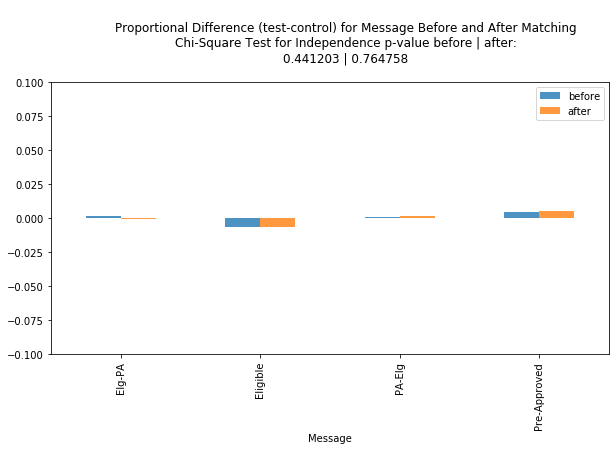

In [16]:
categorical_results = m.compare_categorical(return_table=True)

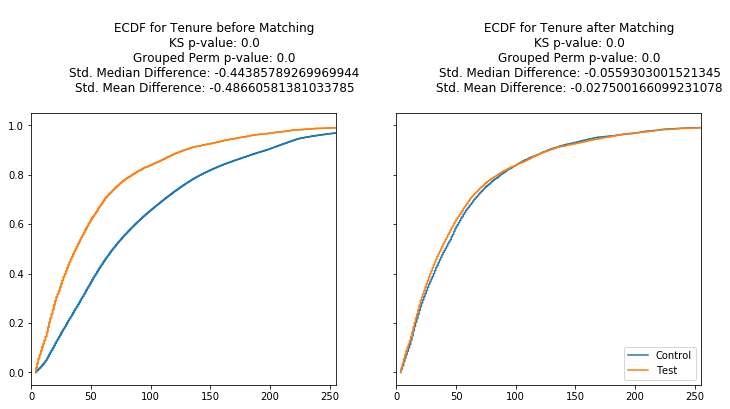

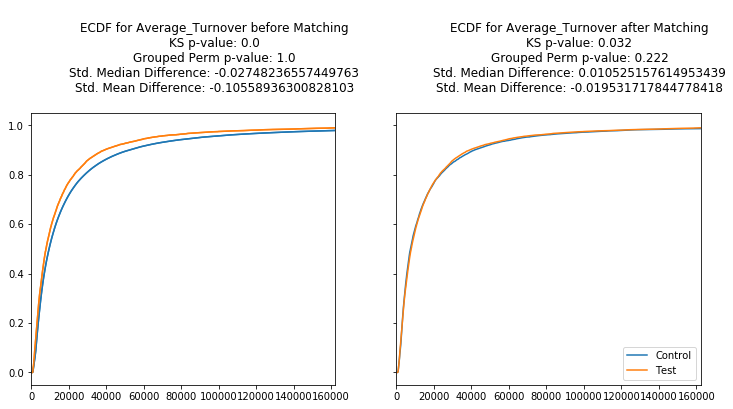

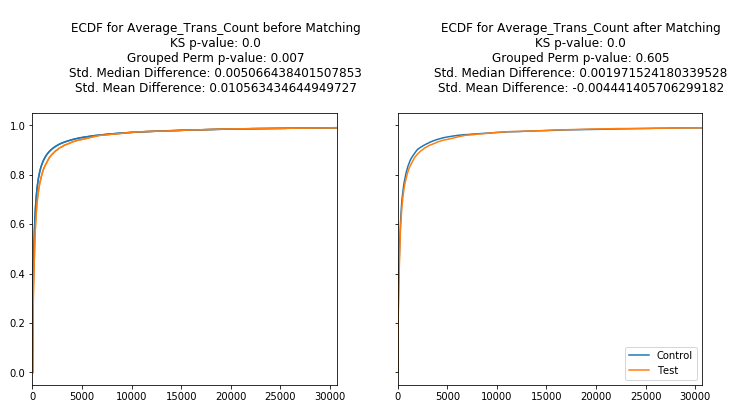

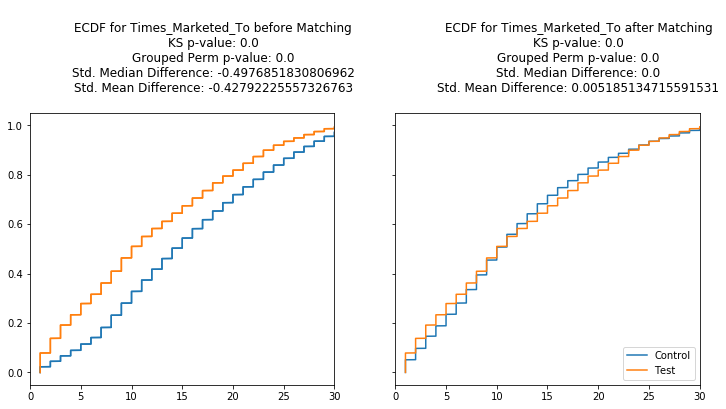

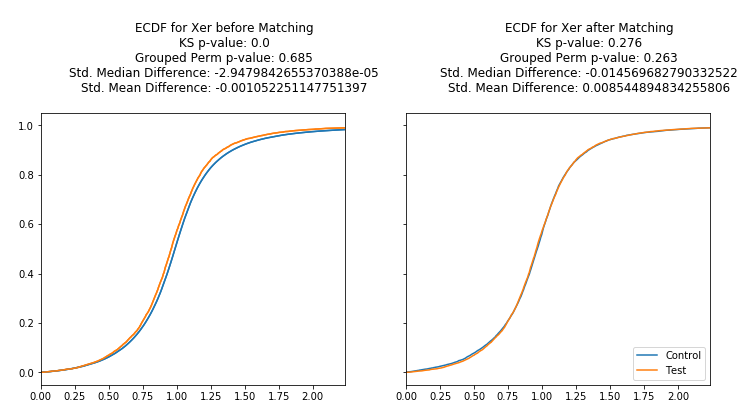

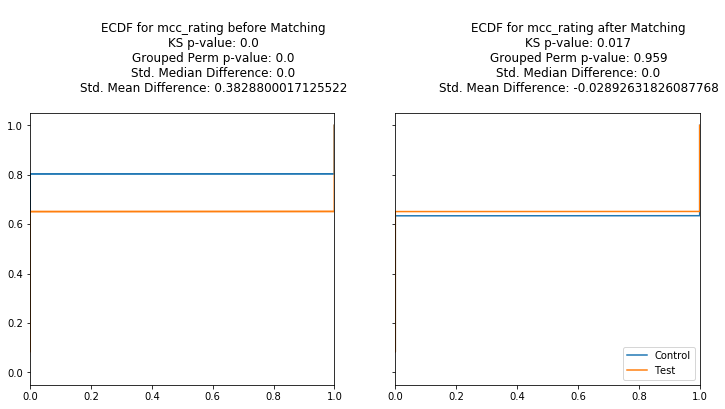

In [17]:
cc = m.compare_continuous(return_table=True)

In [18]:
cc

,var,ks_before,ks_after,grouped_chisqr_before,grouped_chisqr_after,std_median_diff_before,std_median_diff_after,std_mean_diff_before,std_mean_diff_after
0,Tenure,0.0,0.000,0.000,0.000,-0.443858,-0.055930,-0.486606,-0.027500
1,Average_Turnover,0.0,0.032,1.000,0.222,-0.027482,0.010525,-0.105589,-0.019532
2,Average_Trans_Count,0.0,0.000,0.007,0.605,0.005066,0.001972,0.010563,-0.004441
3,Times_Marketed_To,0.0,0.000,0.000,0.000,-0.497685,0.000000,-0.427922,0.005185
4,Xer,0.0,0.276,0.685,0.263,-0.000029,-0.014570,-0.001052,0.008545
5,mcc_rating,0.0,0.017,0.000,0.959,0.000000,0.000000,0.382880,-0.028926
